# 🏥 Lab 3: Medical Image Classification with Neural Networks

**AI in Medicine and Healthcare**  
**Insper Instituto de Ensino e Pesquisa**  
**Week 2 - Class 3**

---

## 📝 Student Information (REQUIRED)

**Student 1:**
- Name: Rodrigo Paoliello de Medeiros
- Email: rodrigopm6@al.insper.edu.br

**Student 2:**
- Name: _______________________
- Email: ______________________

**Date Submitted:** 20/02/2026

---

## 🎯 Today's Challenge

**Can we use the neural networks we learned in Lab 2 to diagnose pneumonia from chest X-rays?**

You already know how to:
- ✅ Build neural networks
- ✅ Implement training loops
- ✅ Evaluate with medical metrics

**Today's new skills:**
- 🆕 Load and visualize medical images
- 🆕 Preprocess images for neural networks
- 🆕 Apply your Lab 2 knowledge to a new domain

**The twist:** We'll use the SAME type of network (MLP) we used for tabular data... on images. Will it work? Let's find out!

---

## 📊 Dataset: Chest X-Ray Pneumonia

- **Source:** Kaggle Chest X-Ray Images (Pneumonia)
- **Classes:** Normal vs Pneumonia
- **Images:** ~5,800 chest X-rays from pediatric patients
- **Task:** Binary classification (like Lab 2, but with images!)
- **Clinical Importance:** Pneumonia kills ~2.5 million people/year globally

---

## ⏱️ Time Allocation

- **Part 1:** Image Loading & Visualization (20 min)
- **Part 2:** Build MLP Classifier (30 min)
- **Part 3:** Training & Evaluation (20 min)
- **Part 4:** Reflection & Analysis (20 min)

**Total:** 90 minutes

---

## 📊 Grading

| Components |
|-----------|
| Part 1: Image Processing |
| Part 2: Model Architecture |
| Part 3: Training & Evaluation |
| Part 4: Reflection Questions |

### Assessment

- **Inadequate**: Did not complete all parts
- **Adequate**: Completed all parts
- **Above Average**: Completed all parts and Bonus Exploration

---

# 🚀 PART 1: Image Loading & Visualization (20 minutes)

First, let's see what medical images actually look like!

---

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

import os
from pathlib import Path

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.10.0+cu128
Torchvision version: 0.25.0+cu128
CUDA available: True


## Step 1.1: Download the Dataset

We'll use a subset of the Chest X-Ray dataset for faster training.

In [2]:
# Download and extract dataset
!gdown --id 17MSlc-0l_SSRevYBbKwQQ1PQGpi_W6VN
!unzip -q chest_xray_compact.zip

print("✓ Dataset ready!")


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17MSlc-0l_SSRevYBbKwQQ1PQGpi_W6VN
From (redirected): https://drive.google.com/uc?id=17MSlc-0l_SSRevYBbKwQQ1PQGpi_W6VN&confirm=t&uuid=e74d6031-b0ac-4c7c-9408-ba34709d4a00
To: /content/chest_xray_compact.zip
100% 191M/191M [00:01<00:00, 154MB/s]
✓ Dataset ready!


## Step 1.2: Explore the Dataset Structure

**TODO:** Explore the directory structure and count images in each category.

In [3]:
# TODO: Set the data directory path
# Hint: data_dir = Path('chest_xray_compact')

data_dir = Path('chest_xray_compact')



# TODO: Count images in train/val/test for both classes
# Hint: Use os.listdir() or Path().glob('*.jpeg')
# Structure: chest_xray_compact/train/NORMAL/*.jpeg and chest_xray_compact/train/PNEUMONIA/*.jpeg

train_normal_count = len(list((data_dir / "train" / "NORMAL").glob("*.jpeg")))
train_pneumonia_count = len(list((data_dir / "train" / "PNEUMONIA").glob("*.jpeg")))



# Print summary
print("Dataset Structure:")
print("="*50)
print(f"Training set:")
print(f"  Normal: {train_normal_count} images")
print(f"  Pneumonia: {train_pneumonia_count} images")
print(f"  Total: {train_normal_count + train_pneumonia_count} images")
print(f"\nClass balance: {train_pneumonia_count/(train_normal_count + train_pneumonia_count)*100:.1f}% pneumonia")

Dataset Structure:
Training set:
  Normal: 200 images
  Pneumonia: 200 images
  Total: 400 images

Class balance: 50.0% pneumonia


## Step 1.3: Visualize Sample Images

**TODO:** Load and display sample chest X-rays from both classes.

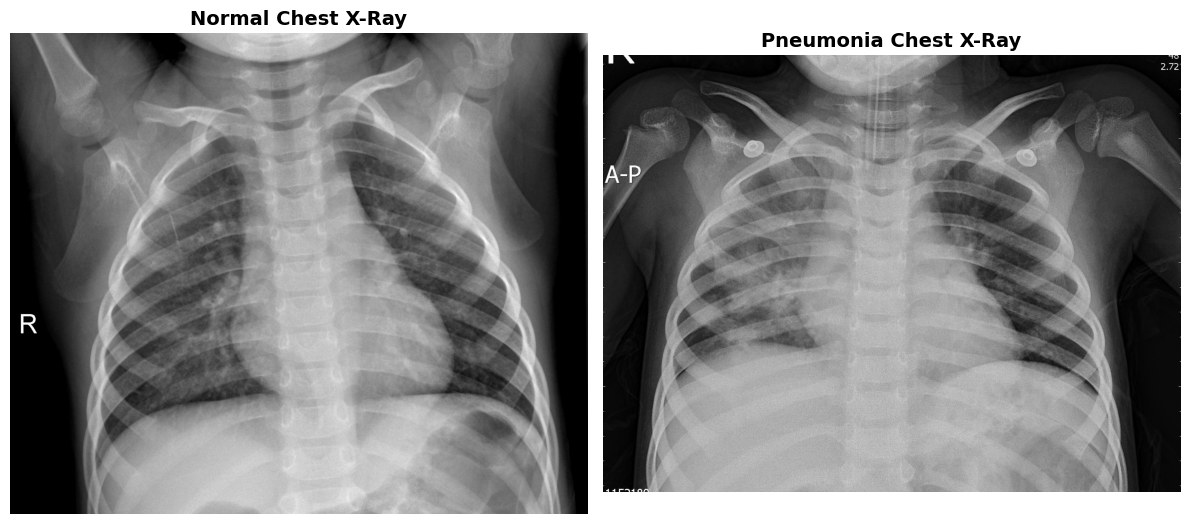

Normal X-ray size: (1800, 1499)
Pneumonia X-ray size: (1456, 1104)


In [4]:
# TODO: Load one normal and one pneumonia X-ray
# Hint: Use PIL.Image.open(image_path)
# Paths: chest_xray_compact/train/NORMAL/... and chest_xray_compact/train/PNEUMONIA/...

# Get sample image paths
normal_images = list(Path('chest_xray_compact/train/NORMAL').glob('*.jpeg'))
pneumonia_images = list(Path('chest_xray_compact/train/PNEUMONIA').glob('*.jpeg'))



# Load first image from each class
normal_img = Image.open(normal_images[0])
pneumonia_img = Image.open(pneumonia_images[0])



# TODO: Display the images side by side
# Hint: Use matplotlib subplot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot normal
axes[0].imshow(normal_img, cmap='gray')
axes[0].set_title('Normal Chest X-Ray', fontsize=14, fontweight='bold')
axes[0].axis('off')



# Plot pneumonia
axes[1].imshow(pneumonia_img, cmap='gray')
axes[1].set_title('Pneumonia Chest X-Ray', fontsize=14, fontweight='bold')
axes[1].axis('off')



plt.tight_layout()
plt.show()

# Print image information
print(f"Normal X-ray size: {normal_img.size if normal_img else 'N/A'}")
print(f"Pneumonia X-ray size: {pneumonia_img.size if pneumonia_img else 'N/A'}")

## Step 1.4: Create Custom Dataset Class

**TODO:** Create a PyTorch Dataset class to load images.

In [15]:
# TODO: Define a custom Dataset class
# Hint: Inherit from torch.utils.data.Dataset
# Must implement __init__, __len__, and __getitem__

class ChestXRayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir: Directory with 'NORMAL' and 'PNEUMONIA' subdirectories
            transform: Optional transform to apply to images
        """
        # TODO: Store parameters
        self.root_dir = Path(root_dir)
        self.transform = transform

        # TODO: Collect all image paths and labels
        # Hint: Loop through NORMAL (label=0) and PNEUMONIA (label=1) folders
        # Store as list of tuples: [(path1, label1), (path2, label2), ...]

        self.images = []  # Will store (image_path, label) tuples

        # Normal images (label = 0)
        normal_dir = self.root_dir / "NORMAL"
        for img_path in normal_dir.glob("*.jpeg"):
            self.images.append((img_path, 0))

        # Pneumonia images (label = 1)
        pneumonia_dir = self.root_dir / "PNEUMONIA"
        for img_path in pneumonia_dir.glob("*.jpeg"):
            self.images.append((img_path, 1))


    def __len__(self):
        # TODO: Return total number of images
        return len(self.images)

    def __getitem__(self, idx):
        # TODO: Load image and label at index idx
        # Hint:
        # 1. Get image path and label from self.images[idx]
        # 2. Load image using PIL.Image.open()
        # 3. Convert to RGB if needed
        # 4. Apply transform if provided
        # 5. Return (image_tensor, label)

        img_path, label = self.images[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


# Test the dataset
print("Testing Dataset class...")
# Uncomment when implemented:
test_dataset = ChestXRayDataset('chest_xray_compact/train')
print(f"Total images: {len(test_dataset)}")
sample_img, sample_label = test_dataset[0]
print(f"Sample image type: {type(sample_img)}")
print(f"Sample label: {sample_label}")


Testing Dataset class...
Total images: 400
Sample image type: <class 'PIL.Image.Image'>
Sample label: 0


## Step 1.5: Define Image Transforms

**TODO:** Create transforms to preprocess images for the neural network.

In [16]:
# TODO: Define image transformations
# Required steps:
# 1. Resize to fixed size (e.g., 64x64 for faster training)
# 2. Convert to grayscale
# 3. Convert to tensor
# 4. Normalize (mean=0.5, std=0.5 for grayscale)

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

print("Image transformations defined:")
print(transform if transform else "TODO: Define transforms")

Image transformations defined:
Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    Grayscale(num_output_channels=1)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)


## Step 1.6: Create DataLoaders

**TODO:** Create train, validation, and test DataLoaders.

In [17]:
# TODO: Create datasets with transforms
# Hint: train_dataset = ChestXRayDataset('chest_xray_compact/train', transform=transform)

train_dataset = ChestXRayDataset('chest_xray_compact/train', transform=transform)
val_dataset = ChestXRayDataset('chest_xray_compact/val', transform=transform)
test_dataset = ChestXRayDataset('chest_xray_compact/test', transform=transform)




# TODO: Create DataLoaders
# Hint: Use batch_size=32, shuffle=True for train

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




# Verify
print("DataLoaders created:")
print(f"Train batches: {len(train_loader) if train_loader else 'N/A'}")
print(f"Val batches: {len(val_loader) if val_loader else 'N/A'}")
print(f"Test batches: {len(test_loader) if test_loader else 'N/A'}")

# Test loading a batch
if train_loader:
    images, labels = next(iter(train_loader))
    print(f"\nBatch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Image range: [{images.min():.2f}, {images.max():.2f}]")

DataLoaders created:
Train batches: 13
Val batches: 4
Test batches: 4

Batch shape: torch.Size([32, 1, 64, 64])
Labels shape: torch.Size([32])
Image range: [-1.00, 0.95]


## 🎉 Part 1 Complete!

**Checkpoint:**
- ✅ Dataset downloaded and explored
- ✅ Sample images visualized
- ✅ Custom Dataset class created
- ✅ Image transforms defined
- ✅ DataLoaders ready

**Key Insight:** Images are 64×64 pixels = 4,096 input features!
(Compare to Lab 2: only 8 features)

---

---

# 🧠 PART 2: Build MLP Classifier (30 minutes)

**The Challenge:** Use the SAME type of network from Lab 2 (MLP) on images.

**Key Question:** A 64×64 grayscale image has 4,096 pixels. How do we feed this to an MLP?

**Answer:** FLATTEN the image into a 1D vector!

---

## Step 2.1: Visualize What Flattening Does

**TODO:** Show what happens when we flatten a 2D image.

/tmp/ipython-input-1706202435.py:35: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


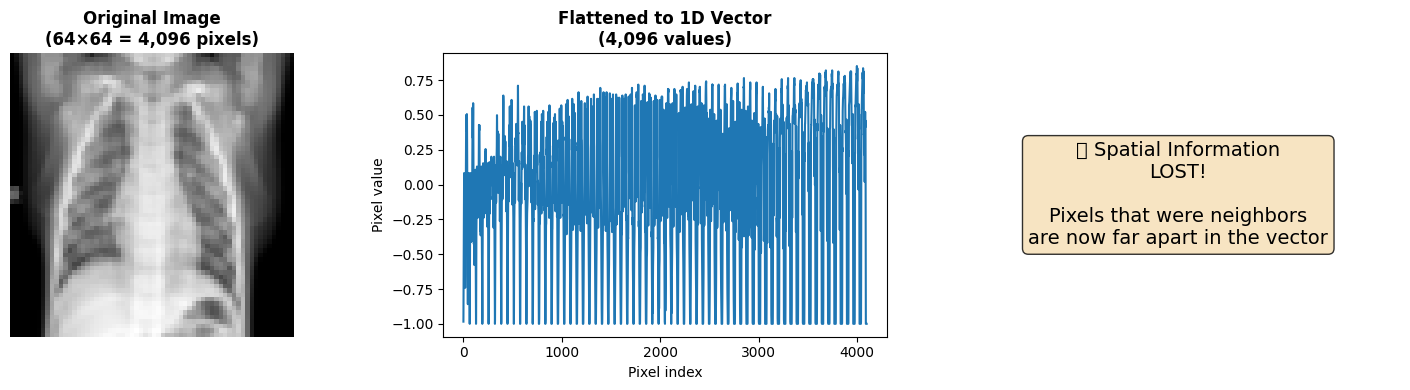

Original shape: torch.Size([1, 64, 64])
Flattened shape: torch.Size([4096])

🤔 Think about: Does the network know which pixels were next to each other?


In [18]:
# Get a sample image
if train_loader:
    sample_images, sample_labels = next(iter(train_loader))
    sample_img = sample_images[0]  # Shape: (1, 64, 64)

    # TODO: Flatten the image
    # Hint: flattened = sample_img.view(-1)

    flattened = sample_img.view(-1)



    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Original image
    axes[0].imshow(sample_img.squeeze(), cmap='gray')
    axes[0].set_title('Original Image\n(64×64 = 4,096 pixels)', fontweight='bold')
    axes[0].axis('off')

    # Flattened visualization
    if flattened is not None:
        axes[1].plot(flattened.numpy())
        axes[1].set_title('Flattened to 1D Vector\n(4,096 values)', fontweight='bold')
        axes[1].set_xlabel('Pixel index')
        axes[1].set_ylabel('Pixel value')

    # Show what's lost
    axes[2].text(0.5, 0.5, '❌ Spatial Information\nLOST!\n\n'
                 'Pixels that were neighbors\nare now far apart in the vector',
                 ha='center', va='center', fontsize=14,
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Original shape: {sample_img.shape}")
    print(f"Flattened shape: {flattened.shape if flattened is not None else 'N/A'}")
    print(f"\n🤔 Think about: Does the network know which pixels were next to each other?")

## Step 2.2: Design the MLP Architecture

**TODO:** Create an MLP classifier for images.

**Architecture:**
```
Input: 4,096 pixels (flattened 64×64 image)
Hidden 1: 128 neurons + ReLU
Hidden 2: 64 neurons + ReLU
Output: 2 classes (Normal vs Pneumonia)
```

In [19]:
# TODO: Define the MLP classifier
# This is VERY similar to Lab 2, but with different input size!

class ChestXRayMLP(nn.Module):
    def __init__(self):
        super(ChestXRayMLP, self).__init__()

        # TODO: Define layers
        # Input size: 64*64 = 4096
        self.fc1 = nn.Linear(4096, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)


    def forward(self, x):
        # TODO: Implement forward pass
        # IMPORTANT: First flatten the image!
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, 4096)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


# TODO: Create model instance
model = ChestXRayMLP()



# Print model info
if model:
    print("Model Architecture:")
    print("="*60)
    print(model)
    print("="*60)

    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"\nTotal parameters: {total_params:,}")
    print(f"Compare to Lab 2: ~300 parameters")
    print(f"This model is {total_params/300:.0f}× larger!")

    # Test forward pass
    test_input = torch.randn(1, 1, 64, 64)
    test_output = model(test_input)
    print(f"\nTest: Input {test_input.shape} → Output {test_output.shape}")

Model Architecture:
ChestXRayMLP(
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

Total parameters: 532,802
Compare to Lab 2: ~300 parameters
This model is 1776× larger!

Test: Input torch.Size([1, 1, 64, 64]) → Output torch.Size([1, 2])


## 🎉 Part 2 Complete!

**Checkpoint:**
- ✅ Understand image flattening
- ✅ MLP architecture defined
- ✅ MUCH larger than Lab 2 (due to 4,096 inputs!)

**Think about:** Why does flattening seem problematic?

---

---

# 🔄 PART 3: Training & Evaluation (20 minutes)

**This should look VERY familiar from Lab 2!**

---

## Step 3.1: Training Setup

**TODO:** Set up loss, optimizer, and device (same as Lab 2!).

In [20]:
# TODO: Define loss function
criterion = nn.CrossEntropyLoss()


# TODO: Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


# TODO: Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# TODO: Move model to device
model = model.to(device)


# Set epochs
num_epochs = 10  # Fewer epochs since images are slower to train

print("Training Setup:")
print("="*50)
print(f"Device: {device}")
print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer.__class__.__name__ if optimizer else 'N/A'}")
print(f"Epochs: {num_epochs}")

Training Setup:
Device: cuda
Loss: CrossEntropyLoss()
Optimizer: Adam
Epochs: 10


## Step 3.2: Training Loop

**TODO:** Implement training loop (copy from Lab 2 and adapt!).

In [21]:
# TODO: Implement training loop
# This is IDENTICAL to Lab 2 - you can reuse that code!

train_losses = []
val_losses = []
val_accuracies = []

print("Starting training...\n")

for epoch in range(num_epochs):
    # ------- Training phase -------
    model.train()
    running_loss = 0.0
    running_samples = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)                    # forward
        loss = criterion(outputs, labels)          # compute loss
        loss.backward()                            # backprop
        optimizer.step()                           # update weights

        batch_size = images.size(0)
        running_loss += loss.item() * batch_size
        running_samples += batch_size

    epoch_train_loss = running_loss / running_samples
    train_losses.append(epoch_train_loss)

    # ------- Validation phase -------
    model.eval()
    val_running_loss = 0.0
    val_running_samples = 0
    correct = 0

    if val_loader is not None:
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                batch_size = images.size(0)
                val_running_loss += loss.item() * batch_size
                val_running_samples += batch_size

                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()

        epoch_val_loss = val_running_loss / val_running_samples if val_running_samples > 0 else 0.0
        val_losses.append(epoch_val_loss)
        epoch_val_acc = correct / val_running_samples if val_running_samples > 0 else 0.0
        val_accuracies.append(epoch_val_acc)
    else:
        epoch_val_loss = None
        epoch_val_acc = None

    # Print epoch summary
    if epoch_val_loss is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}]  Train Loss: {epoch_train_loss:.4f}  Val Loss: {epoch_val_loss:.4f}  Val Acc: {epoch_val_acc*100:.2f}%")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}]  Train Loss: {epoch_train_loss:.4f}  (no validation loader)")

print("✓ Training complete!")

Starting training...

Epoch [1/10]  Train Loss: 0.4745  Val Loss: 0.3024  Val Acc: 89.00%
Epoch [2/10]  Train Loss: 0.2391  Val Loss: 0.3865  Val Acc: 86.00%
Epoch [3/10]  Train Loss: 0.2411  Val Loss: 0.3783  Val Acc: 89.00%
Epoch [4/10]  Train Loss: 0.1764  Val Loss: 0.4250  Val Acc: 86.00%
Epoch [5/10]  Train Loss: 0.1547  Val Loss: 0.2614  Val Acc: 91.00%
Epoch [6/10]  Train Loss: 0.1244  Val Loss: 0.2797  Val Acc: 87.00%
Epoch [7/10]  Train Loss: 0.1050  Val Loss: 0.3356  Val Acc: 85.00%
Epoch [8/10]  Train Loss: 0.1029  Val Loss: 0.3597  Val Acc: 89.00%
Epoch [9/10]  Train Loss: 0.1130  Val Loss: 0.3118  Val Acc: 92.00%
Epoch [10/10]  Train Loss: 0.0777  Val Loss: 0.4019  Val Acc: 88.00%
✓ Training complete!


## Step 3.3: Plot Training Curves

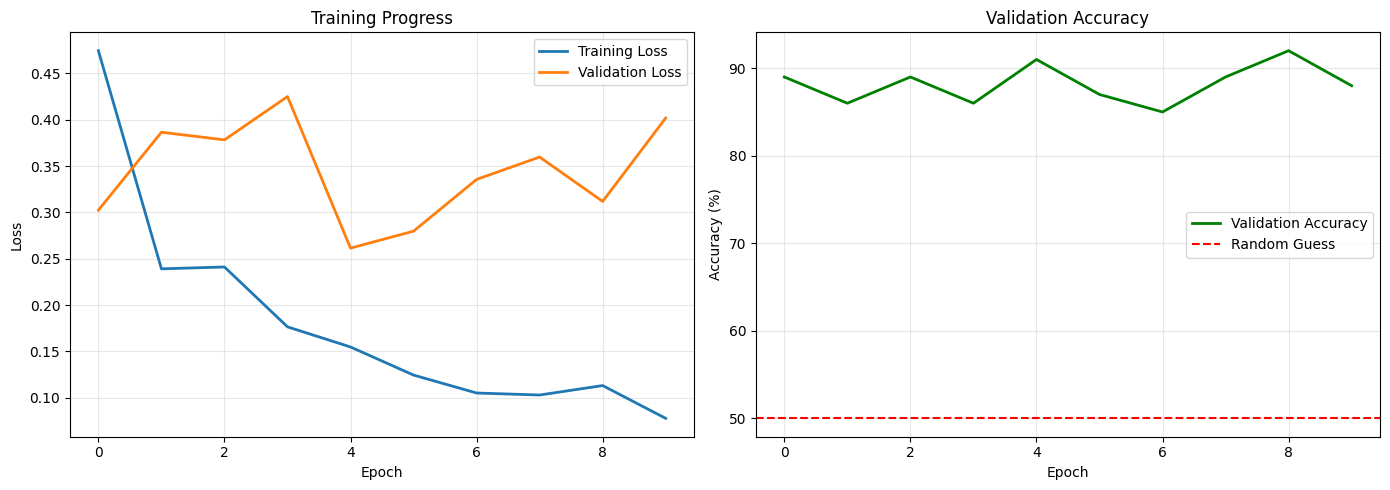

Final validation accuracy: 88.00%


In [26]:
# TODO: Plot training curves (same as Lab 2!)

if len(train_losses) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss curves
    ax1.plot(train_losses, label='Training Loss', linewidth=2)
    ax1.plot(val_losses, label='Validation Loss', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Progress')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy curve
    val_acc_percent = [acc * 100 for acc in val_accuracies]
    ax2.plot(val_acc_percent, label='Validation Accuracy', color='green', linewidth=2)
    ax2.axhline(y=50, color='red', linestyle='--', label='Random Guess')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Final validation accuracy: {val_acc_percent[-1]:.2f}%")

## Step 3.4: Evaluate on Test Set

**TODO:** Compute medical metrics on test set.

In [27]:
# TODO: Evaluate on test set (same as Lab 2!)
# Compute: accuracy, precision, sensitivity, specificity, confusion matrix

if model:
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy().tolist())
            all_labels.extend(labels.cpu().numpy().tolist())

    # TODO: Compute metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=0)
    sensitivity = recall_score(all_labels, all_preds, zero_division=0)  # recall = sensitivity
    cm = confusion_matrix(all_labels, all_preds)

    # Confusion matrix: [[TN, FP],
    #                    [FN, TP]]
    TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0,0,0,0)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0

    # Print results
    print("\nTest Set Results:")
    print("="*50)
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Sensitivity (Recall, TPR): {sensitivity*100:.2f}%")
    print(f"Specificity (TNR): {specificity*100:.2f}%")
    print("\nConfusion Matrix:")
    print(cm)


Test Set Results:
Accuracy: 92.00%
Precision: 97.73%
Sensitivity (Recall, TPR): 86.00%
Specificity (TNR): 98.00%

Confusion Matrix:
[[49  1]
 [ 7 43]]


## 🎉 Part 3 Complete!

**How did we do?**

Compare to Lab 2:
- Lab 2 (diabetes, tabular): ~76% accuracy
- Lab 3 (pneumonia, images): ~92% accuracy

**Interesting, right?** 🤔

---

---

# 🤔 PART 4: Reflection & Analysis (20 minutes)

**The most important part: THINKING about what we learned!**

---

## Reflection Question 1: Performance Comparison

**Compare your results:**

| Metric | Lab 2 (Diabetes) | Lab 3 (Pneumonia) | Difference |
|--------|------------------|-------------------|------------|
| Input Features | 8 | 4,096 | 512× more |
| Parameters | ~300 | ~500,000 | 1,600× more |
| Accuracy | ~76% | 92% | 20% more |
| Training Time/Epoch | Fast | Slower | Slower |

**Question:** Why might we get WORSE accuracy despite having MORE features and a BIGGER model?

**Your answer:**

More features and a bigger model doesn't always mean a better accuracy. Using more features than we actually need can confuse the model if we don't have enough data points. A bigger model might overfit to the training data and learn the noise instead of the pattern.

---

## Reflection Question 2: The Flattening Problem

When we flatten a 64×64 image:

```
Before:        After:
[row 0]        [pixel 0, pixel 1, pixel 2, ..., pixel 4095]
[row 1]        
[row 2]        Pixels that were neighbors
 ...           are now far apart!
[row 63]
```

**Questions to think about:**

1. **Does the MLP know that pixel 0 and pixel 1 were next to each other?**
   - Your answer: No, after flattening the image becomes a 1D vector.

2. **In a chest X-ray, what matters more: individual pixel values OR patterns of nearby pixels?**
   - Your answer: Patterns of nearby pixels. Medical findings are represented in multiple pixels, not individual ones.

3. **Example:** The pattern for "lung opacity" (pneumonia indicator) involves a cluster of bright pixels. Does our MLP naturally detect clusters?
   - Your answer: No, an MLP doesn't detect clusters because is does not preserve a 2D structure.

---

## Reflection Question 3: What's Missing?

**When a radiologist looks at a chest X-ray, they look for:**
- Shapes (heart silhouette, lung boundaries)
- Textures (smooth vs. patchy)
- Relative positions (is the opacity in the upper or lower lobe?)
- Edges (clear vs. fuzzy boundaries)

**Question:** Our MLP treats each pixel independently. What medical information might we be losing?

**Your answer:**

When we flatten a chest X-ray image, we lose the spatial relationships between pixels. Medical interpretation relies on shapes, textures, edges, and the relative positions of structures—such as lung boundaries or clusters of opacity. Flattening destroys the two-dimensional structure, so the model no longer inherently knows which pixels are neighbors or form meaningful patterns. As a result, important information like patchy opacities, sharp versus blurry edges, and the location of abnormalities within the lungs is not naturally preserved.

---

## Reflection Question 4: If You Were Designing a Better Architecture...

**Imagine you could design a network specifically for images. What would you want it to do differently?**

Some ideas to consider:
- Process nearby pixels together?
- Look for local patterns (edges, shapes)?
- Understand that shifting the image slightly doesn't change the diagnosis?
- Build up understanding from small patterns → larger patterns?

**Your ideas:**

A better image classifier should preserve spatial structure instead of flattening the image. It should process nearby pixels together to detect local patterns like edges and textures, then combine those small patterns into larger shapes.

**Hint:** We'll explore solutions to these problems in the coming weeks! 😉

---

## Bonus Exploration: Visualize What the Model Learned

**TODO (Optional):** Look at some misclassified examples.

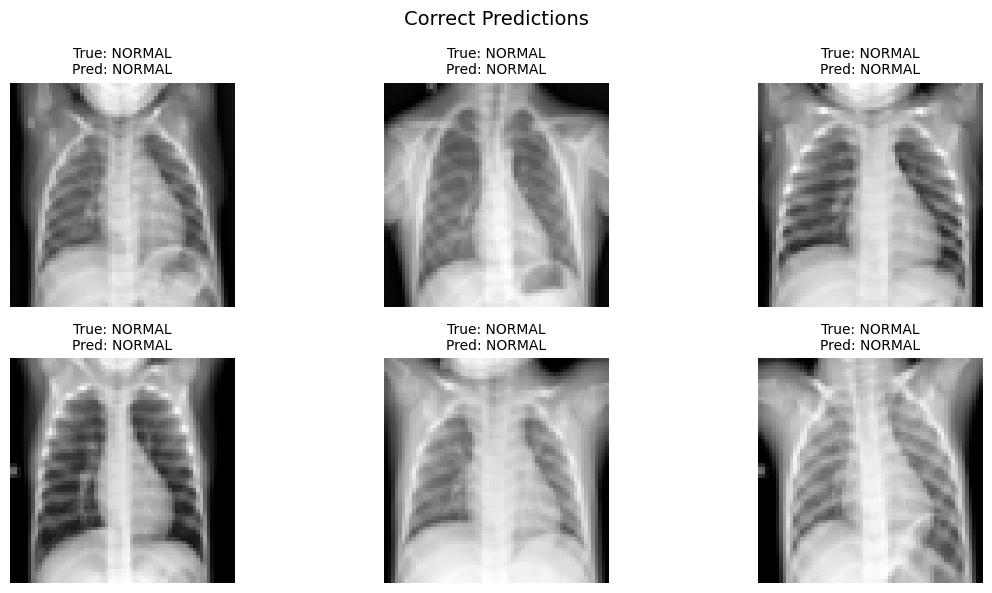

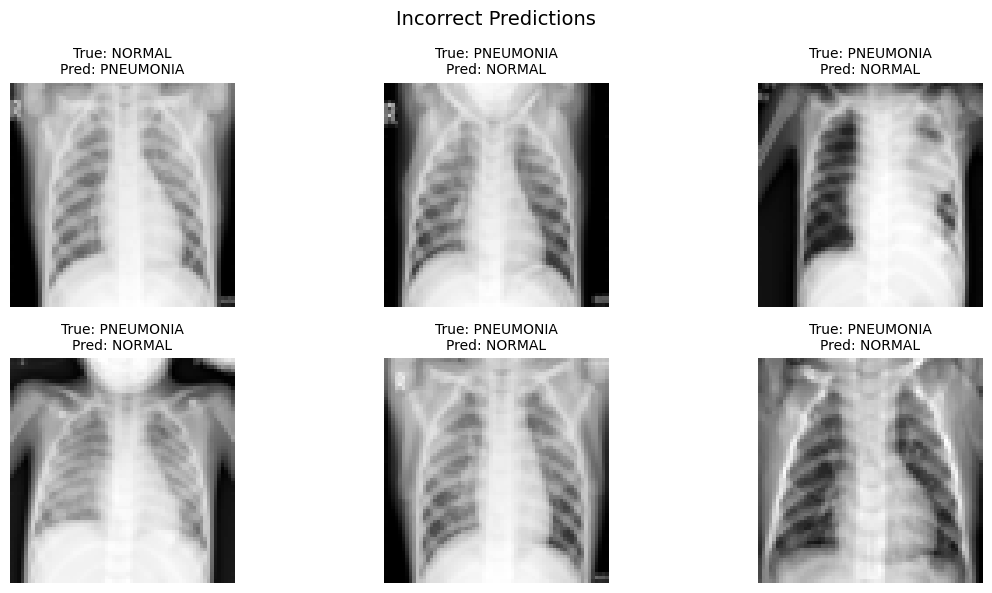

In [28]:
# Optional: Show examples of correct and incorrect predictions
# This helps understand where the model struggles

# TODO: Get predictions and find misclassified images
# Show side-by-side: correct predictions vs wrong predictions

num_examples = 6  # per category (correct / incorrect)
correct_examples = []
incorrect_examples = []

if model and test_loader:
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            for img, pred, lab in zip(images, preds, labels):
                cpu_img = img.cpu()
                pred_i = int(pred.cpu().item())
                lab_i = int(lab.cpu().item())

                if pred_i == lab_i and len(correct_examples) < num_examples:
                    correct_examples.append((cpu_img, lab_i, pred_i))
                elif pred_i != lab_i and len(incorrect_examples) < num_examples:
                    incorrect_examples.append((cpu_img, lab_i, pred_i))

            # stop early if we have enough examples
            if len(correct_examples) >= num_examples and len(incorrect_examples) >= num_examples:
                break

    def denormalize(img_tensor):
        # img_tensor shape: (1, H, W), normalized with mean=0.5 std=0.5
        img = img_tensor * 0.5 + 0.5
        img = img.squeeze().numpy()
        return img

    # Plot correct examples
    if len(correct_examples) > 0:
        cols = min(3, len(correct_examples))
        rows = (len(correct_examples) + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
        axes = np.array(axes).reshape(-1)
        for ax in axes[len(correct_examples):]:
            ax.axis('off')
        for i, (img, lab, pred) in enumerate(correct_examples):
            axes[i].imshow(denormalize(img), cmap='gray')
            axes[i].set_title(f"True: {'PNEUMONIA' if lab==1 else 'NORMAL'}\nPred: {'PNEUMONIA' if pred==1 else 'NORMAL'}", fontsize=10)
            axes[i].axis('off')
        plt.suptitle("Correct Predictions", fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("No correct examples collected.")

    # Plot incorrect examples
    if len(incorrect_examples) > 0:
        cols = min(3, len(incorrect_examples))
        rows = (len(incorrect_examples) + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
        axes = np.array(axes).reshape(-1)
        for ax in axes[len(incorrect_examples):]:
            ax.axis('off')
        for i, (img, lab, pred) in enumerate(incorrect_examples):
            axes[i].imshow(denormalize(img), cmap='gray')
            axes[i].set_title(f"True: {'PNEUMONIA' if lab==1 else 'NORMAL'}\nPred: {'PNEUMONIA' if pred==1 else 'NORMAL'}", fontsize=10)
            axes[i].axis('off')
        plt.suptitle("Incorrect Predictions", fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("No incorrect examples collected.")
else:
    print("Model or test_loader not available. Skipping example display.")

---

## 🎓 Lab 3 Summary

### What We Accomplished:

✅ **Applied Lab 2 knowledge** to a new domain (images!)  
✅ **Loaded and visualized** medical images  
✅ **Built an MLP** for image classification  
✅ **Trained and evaluated** with medical metrics  
✅ **Discovered limitations** of MLPs for images  

### Key Insights:

1. **Flattening loses spatial information** - crucial for images!
2. **More features ≠ better performance** - if architecture is wrong
3. **Images are different from tabular data** - need different approaches
4. **Medical imaging is challenging** - but solvable with right tools!

### Coming Up:

- **Next week:** DICOM protocol, medical imaging modalities
- **Soon:** Better architectures for images (hint: CNNs!)
- **2-3 weeks:** Hospital visit to see MRI/CT machines!

---

## 📤 Submission Instructions

1. **Complete all TODOs** in this notebook
2. **Answer reflection questions** thoughtfully
3. **Save:** File → Download → .ipynb
4. **Name:** `Lab3_LastName1_LastName2.ipynb`
5. **Submit to Blackboard** by [deadline]

**Questions to discuss next class!** 💭

---